# Neighborhood analysis 

In [11]:
import pickle
import sys, os
sys.path.append("/Users/chilpert/Work/pyproteinsExt/src")
sys.path.append("/Users/chilpert/Work/pyproteins/src")
import pyproteinsExt 
import pyproteins
import time
import subprocess
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
def save(data, tag=None):
    saveDir="/Volumes/arwen/mobi/group/NOX_CH/pickle_saved"
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fTag = "NOX_annotation_" + tag + "_" if tag else "NOX_annotation_"
    fSerialDump = fTag + timestr + ".pickle"
    with open(saveDir + '/' + fSerialDump, 'wb') as f:
        pickle.dump(data, f)
    print('data structure saved to', saveDir + '/' + fSerialDump)

def load(fileName):
    saveDir="/Users/chilpert/Work/NOX_results/pickle_saved"
    d = pickle.load( open(saveDir + "/" + fileName, "rb" ) )
    print("restore a annotated container of ", len(d), "elements")
    return d

### Load data

In [4]:
data=load("NOX_annotation_fullPfam_withProteinFound_20190503-144849.pickle")

restore a annotated container of  386 elements


### Retrieve genomes and their proteins

* Try from uniprot entries

In [7]:
import pyproteinsExt.uniprot as uniprot
uColl = uniprot.getUniprotCollection()
uColl.setCache(location='/Users/chilpert/cache/uniprot')
c=0
for p in data :
    if data[p]['prot_found']:
        c+=1
        search_id=list(data[p]['prot_found'])[0]
        obj=uColl.get(search_id)  
        data[p]['RefSeq']={}
        data[p]['RefSeq']['genome']=obj.Genome.RefSeqRef
        data[p]['RefSeq']['protein']=obj.Genome.RefSeqProteinRef
        data[p]['EMBL']={}
        data[p]['EMBL']['genome']=obj.Genome.EMBLRef 
        data[p]['EMBL']['protein']=obj.Genome.EMBLProteinRef
print(c,"proteins with Uniprot entry.")        

getUniprotCollection
init EntrySet
Acknowledged 0 entries (/Users/chilpert)
Changing cache location to /Users/chilpert/cache/uniprot
Reindexing /Users/chilpert/cache/uniprot
Acknowledged 0 entries (/Users/chilpert/cache/uniprot)
init Entry
got to fetch D7WNV4
init Entry
got to fetch A0A2D6BE15
init Entry
got to fetch U5VVH8
init Entry
got to fetch Q0ACJ0
init Entry
got to fetch A0A096F949
init Entry
got to fetch X5M7H4
init Entry
got to fetch A0A135I808
init Entry
got to fetch A0A1B9PQF8
init Entry
got to fetch A0A2H0AHH8
init Entry
got to fetch S4NJU4
init Entry
got to fetch A0A375AGA8
init Entry
got to fetch A0A238ZKY5
init Entry
got to fetch A0A3N1CTZ1
init Entry
got to fetch A0A0G0PT66
init Entry
got to fetch A0A2T5U2A7
init Entry
got to fetch A0A1H1QLN3
init Entry
got to fetch A0A1F4YH09
init Entry
got to fetch A0A2T6GTG1
init Entry
got to fetch A0A0M9ZXE1
init Entry
got to fetch A0A286I840
init Entry
got to fetch A0A0D7ELD5
init Entry
got to fetch A0A2E2MJ55
init Entry
got to fet

init Entry
got to fetch A0A2N2QTW4
init Entry
got to fetch A0A2A3JWD5
init Entry
got to fetch G5KH57
init Entry
got to fetch A0A2X0WXD6
init Entry
got to fetch A0A1H0SAB2
init Entry
got to fetch A0A1F6T9J3
init Entry
got to fetch A0A024YN82
init Entry
got to fetch A0A349S867
init Entry
got to fetch A0A1M2YIW1
init Entry
got to fetch A0A1V5HAL9
init Entry
got to fetch A0A359FEU3
init Entry
got to fetch A0A3E1DU62
init Entry
got to fetch A0A1G9VPB5
init Entry
got to fetch A0A1G9FZV0
init Entry
got to fetch A0A094QEM8
init Entry
got to fetch A0A395LCK1
init Entry
got to fetch A0A2T7JNC5
init Entry
got to fetch A0A2P2DTW3
init Entry
got to fetch A0A1U9RGQ8
init Entry
got to fetch A0A2G9DWU9
init Entry
got to fetch A0A2G9NHU0
init Entry
got to fetch A0A2S1Z857
init Entry
got to fetch A0A011MKR8
init Entry
got to fetch A0A0G1H906
init Entry
got to fetch A0A1G0YH60
init Entry
got to fetch M1UHI8
init Entry
got to fetch A0A3N4GBI5
init Entry
got to fetch A0A100JHT9
init Entry
got to fetch A0A2

In [8]:
save(data,"withGenomeRef")

data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_withGenomeRef_20190503-145326.pickle


In [9]:
data=load("NOX_annotation_withGenomeRef_20190503-145326.pickle")

restore a annotated container of  386 elements


In [17]:
import pyproteinsExt.refseq as refseq
refseqColl=refseq.getRefseqCollection()
refseqColl.setCache(location="/Users/chilpert/cache/refseq")
notBrowsed={}

count_refseq=0
count_protein_found=0
count_refseq_no_features=0
for p in data : 
    if data[p]['prot_found']:
        if data[p]['RefSeq']['genome']:
            data[p]['RefSeq']['neighborhood']={}
            count_refseq+=1
            obj=refseqColl.get(data[p]['RefSeq']['genome'][0])
            protein_feature=obj.searchCDS(data[p]['RefSeq']['protein'][0])
            if protein_feature: 
                count_protein_found+=1
                data[p]['RefSeq']['protein_feature']=protein_feature
                obj.getNeighborhood(protein_feature,10000)
                for n in obj.neighborhood: 
                    data[p]['RefSeq']['neighborhood'][n]={'cluster':None}

print(str(count_refseq)+" out of "+str(len(data))+ " proteins have RefSeq ID for the associated genome.")
print("We retrieve proteins from RefSeq annotation for "+str(count_protein_found)+" proteins.")
print(str(count_refseq_no_features))

Changing cache location to /Users/chilpert/cache/refseq
Reindexing /Users/chilpert/cache/refseq
Acknowledged 79 entries (/Users/chilpert/cache/refseq)
NEIGHBORHOOD
LIMITS 58530 None 79762 None
Protein not found
Protein not found
NEIGHBORHOOD
LIMITS 510542 None 531888 None
NEIGHBORHOOD
LIMITS 517074 None 538399 None
NEIGHBORHOOD
LIMITS 76364 None 97653 None
Protein not found
Protein not found
NEIGHBORHOOD
LIMITS 57094 None 78386 None
NEIGHBORHOOD
LIMITS 30816 None 52048 None
NEIGHBORHOOD
LIMITS 3995 None 25401 None
NEIGHBORHOOD
LIMITS 242635 None 263978 None
Protein not found
Protein not found
NEIGHBORHOOD
LIMITS 110888 None 132219 None
Protein not found
NEIGHBORHOOD
LIMITS 0 32703 14834 None
NEIGHBORHOOD
LIMITS 158237 None 179556 None
Protein not found
Protein not found
Protein not found
NEIGHBORHOOD
LIMITS 17541 None 38869 None
NEIGHBORHOOD
LIMITS 310745 None 332094 None
NEIGHBORHOOD
LIMITS 14559 None 35902 None
NEIGHBORHOOD
LIMITS 248739 None 268226 8117
NEIGHBORHOOD
LIMITS 28077 Non

In [12]:
save(data,"withNeighborhood")

data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_withNeighborhood_20190503-150851.pickle


In [13]:
data=load("NOX_annotation_withNeighborhood_20190503-150851.pickle")

restore a annotated container of  386 elements


In [18]:
c=0
fasta_out=open("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/uniprot_refseq_neighborhood.fasta","w")
c_neighbors=0
for p in data : 
    if data[p]['prot_found']:
        if data[p]['RefSeq'].get("neighborhood",None):
            #print(p)
            #print("PROTEIN",data[p]['RefSeq']['protein_feature'].qualifiers.get("protein_id",None),data[p]['RefSeq']['protein_feature'].qualifiers.get("product",None))
            for feature in data[p]['RefSeq']['neighborhood']: 
                c_neighbors+=1
                id=feature.qualifiers.get("protein_id",None)
                name=feature.qualifiers.get("product",None)
                seq=feature.qualifiers.get("translation",None)
                if id : 
                    fasta_out.write(">"+p+"+"+id+" "+name+"\n"+seq+"\n")
            c+=1
fasta_out.close()        
print(str(c)+" proteins with neighborhood found from Uniprot entry (with RefSeq reference).")
print(str(c_neighbors)+" neigbors proteins found.")

47 proteins with neighborhood found from Uniprot entry (with RefSeq reference).
861 neigbors proteins found.


#### Cluster neighborhood proteins with mmseqs2 default 80% threshold

```console 
WORKDIR=/Volumes/arwen/mobi/group/NOX_CH/Neighborhood

mmseqs createdb $WORKDIR/uniprot_refseq_neighborhood.fasta $WORKDIR/uniprot_refseq_neighborhood.mmseqsdb

mmseqs cluster $WORKDIR/uniprot_refseq_neighborhood.mmseqsdb $WORKDIR/uniprot_refseq_neighborhood_cluster80 $WORKDIR/tmp_uniprot_refseq_neighborhood_cluster80

mmseqs createtsv $WORKDIR/uniprot_refseq_neighborhood.mmseqsdb $WORKDIR/uniprot_refseq_neighborhood.mmseqsdb $WORKDIR/uniprot_refseq_neighborhood_cluster80 $WORKDIR/uniprot_refseq_neighborhood_cluster80.tsv --full-header
```

#### Treat clustering results

In [7]:
f=open("/Users/chilpert/Work/NOX_results/Neighborhood/uniprot_refseq_neighborhood_cluster80.tsv")
dic_cluster={}
cluster_nb=0
browse_representative=set()
for l in f :
    l_split=l.rstrip().split("\t")
    representative=l_split[0].split(" ")[0].strip('"')
    seq=l_split[1].split(" ")[0].strip('"')
    seq_desc=" ".join(l_split[1].split(" ")[1:]).rstrip(" ").strip('"')
    if representative not in browse_representative: 
        cluster_nb+=1
        dic_cluster[cluster_nb]={'seq':set(),'descs':set()}
        browse_representative.add(representative)
    dic_cluster[cluster_nb]['seq'].add(seq)
    dic_cluster[cluster_nb]['descs'].add(seq_desc)

print(str(len(dic_cluster))+" clusters have been created.")

664 clusters have been created.


* Verify if we have 2 proteins in same neighborhood in one cluster

In [8]:
c_nosingle=0
for c in dic_cluster : 
    if len(dic_cluster[c]['seq'])>1: 
        c_nosingle+=1
        set_link_protein=set()
        for seq in dic_cluster[c]['seq']:
            set_link_protein.add(seq.split("+")[1]) 
        if len(dic_cluster[c]['seq'])!=len(set_link_protein):
            print("Cluster "+c+" contains proteins in same neighborhood. HANDLE IT !!!!")
print(str(c_nosingle)+" cluster contains more than 1 protein.")        

107 cluster contains more than 1 protein.


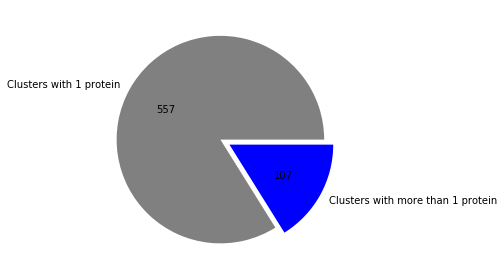

In [38]:
labels='Clusters with 1 protein','Clusters with more than 1 protein'
size=[len(dic_cluster)-c_nosingle,c_nosingle]
explode=(0,0.1)
colors=['grey','blue']
plt.pie(size,labels=labels,explode=explode,colors=colors,autopct=lambda p: '{:.0f}'.format(p * len(dic_cluster) / 100))
plt.tight_layout()
plt.savefig("/Users/chilpert/Work/NOX_visu/clusters_size.pdf", bbox_inches='tight',format="pdf")

In [29]:
dic_nb_cluster={}
for c in dic_cluster: 
    nb_proteins=len(dic_cluster[c]['seq']) 
    if nb_proteins not in dic_nb_cluster: 
        dic_nb_cluster[nb_proteins]=0 
    dic_nb_cluster[nb_proteins]+=1

In [47]:
print(dic_nb_cluster)

{1: 557, 2: 83, 3: 13, 5: 1, 4: 5, 6: 3, 7: 1, 11: 1}


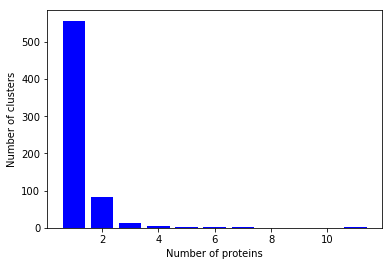

In [32]:
import matplotlib.pyplot as plt
x=list(dic_nb_cluster.keys())
y=list(dic_nb_cluster.values())
plt.bar(x,y,color="blue")
plt.ylabel("Number of clusters")
plt.xlabel("Number of proteins")
plt.savefig("/Users/chilpert/Work/NOX_visu/neighborhood_distrib_cluster.pdf",format="pdf")

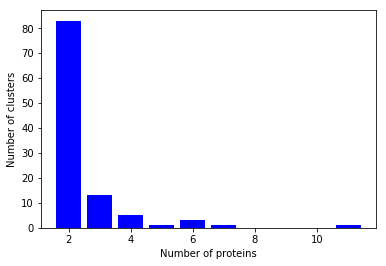

In [34]:
x_nosingle=x[1:]
y_nosingle=y[1:]
plt.bar(x_nosingle,y_nosingle,color="blue")
plt.ylabel("Number of clusters")
plt.xlabel("Number of proteins")
plt.savefig("/Users/chilpert/Work/NOX_visu/neighborhood_distrib_cluster_nosingle.pdf",format="pdf")

* Add clusters information to data container and write clusters informations output

In [21]:
clusters_info=open("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/uniprot_refseq_neighborhood_clusters.info","w")
clusters_info.write("#Cluster\tNumber of proteins\tList of proteins\tProteins description(s)\n")
for c in dic_cluster: 
    clusters_info.write(str(c)+"\t"+str(len(dic_cluster[c]['seq']))+"\t"+",".join(dic_cluster[c]['seq'])+"\t"+",".join(dic_cluster[c]['descs'])+"\n")
    for seq in dic_cluster[c]['seq']:
        prot=seq.split("+")[0]
        seq_id=seq.rstrip().split("+")[1]
        seq_feature=[f for f in data[prot]['RefSeq']['neighborhood'] if f.qualifiers.get('protein_id',None)==seq_id][0]
        data[prot]['RefSeq']['neighborhood'][seq_feature]['cluster']=c
clusters_info.close()        

* Write proteins stats

In [54]:
proteins_stats=open("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/proteins_neighbors_stats.tsv","w")
proteins_stats.write("#Protein\tNumber of neighbors\tList of neighbors number\tList of neighbors id\tList of neighbors description\n")

for p in data : 
    if data[p]['prot_found']: 
        if data[p]['RefSeq'].get("neighborhood",None):
            valid_neighbors=[n for n in data[p]['RefSeq']['neighborhood'] if data[p]['RefSeq']['neighborhood'][n]['cluster']]
            clusters=[str(data[p]['RefSeq']['neighborhood'][n]['cluster']) for n in valid_neighbors]
            ids=[n.qualifiers.get("protein_id",None) for n in valid_neighbors]
            descs=[n.qualifiers.get("product",None) for n in valid_neighbors]
            proteins_stats.write(p+"\t"+str(len(valid_neighbors))+"\t"+",".join(clusters)+"\t"+",".join(ids)+"\t"+",".join(descs)+"\n")
proteins_stats.close()

* Create cluster dic with cluster as key and nox protein as value.  

In [57]:
dic_neighbor={}
for p in data : 
    if data[p]['prot_found']:
        if data[p]['RefSeq'].get("neighborhood",None): 
            for f in data[p]['RefSeq']['neighborhood']: 
                cluster=data[p]['RefSeq']['neighborhood'][f].get('cluster',None)
                if cluster:
                    if cluster not in dic_neighbor: 
                        dic_neighbor[cluster]=[]
                    dic_neighbor[cluster].append(p)        


* Assemble clusters to contains same nox protein

In [58]:
def assemble_neighbors_with_same_proteins(dic_neighbor):
    intermediate_dic={}
    for c in dic_neighbor:
        dic_neighbor[c].sort()
        prots=",".join(dic_neighbor[c])
        if not prots in intermediate_dic: 
            intermediate_dic[prots]=set()
        intermediate_dic[prots].add(str(c))
    #print(intermediate_dic)    
    new_dic={}    
    for p in intermediate_dic: 
        clusts=",".join(intermediate_dic[p])
        new_dic[clusts]=p.split(",")
    return new_dic    

In [59]:
assemble_dic_neighbor=assemble_neighbors_with_same_proteins(dic_neighbor)

* Sort by number of proteins and by number of neighbors

In [60]:
from collections import OrderedDict
ordered_dic_neighbor_by_prot=OrderedDict(sorted(assemble_dic_neighbor.items(),key=lambda kv: len(kv[1]),reverse=True))
ordered_dic_neighbor_by_neighbor=OrderedDict(sorted(assemble_dic_neighbor.items(),key=lambda kv: kv[0].count(","),reverse=True))

In [61]:
all_tree=pickle.load(open('/Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_Tree_20190503-153759.pickle',"rb"))

In [62]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()

In [63]:
from statistics import mean

def get_upper_node(taxids,all_tree):
    if len(taxids)==1: 
        return all_tree.search_nodes(name=taxids[0])[0]
    else:     
        tree=ncbi.get_topology(taxids)
        traverse_generator=tree.traverse()
        return next(traverse_generator)
    
def get_mean_distance(taxids,all_tree):
    dists=[]
    tree=ncbi.get_topology(taxids)
    if len(taxids)==1:
        return 0
    for i in range(len(taxids)): 
        for j in range(i+1,len(taxids)): 
            dist=tree.get_distance(taxids[i],taxids[j])
            dists.append(dist)
    return mean(dists)        

In [64]:
o=open("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/assemble_neigbors_stats.tsv","w")
o.write("#Neighbor\tNumber of proteins\tProteins\tNeighbor cluster description\tUpper node(taxid)\tUpper node(name)\tUpper node (rank)\tMean distance\n")
for c in ordered_dic_neighbor_by_prot: 
    proteins=ordered_dic_neighbor_by_prot[c]
    taxids=list(set([data[p]['taxid'] for p in proteins]))
    upper_node=get_upper_node(taxids,all_tree)
    mean_distance=get_mean_distance(taxids,all_tree)
    cluster_desc=""
    for sub_c in c.split(","):
        desc=",".join(dic_cluster[int(sub_c)]['descs'])+";"
        cluster_desc=cluster_desc+desc
    cluster_desc=cluster_desc.rstrip(";")
    o.write(c+"\t"+str(len(proteins))+"\t"+",".join(proteins)+"\t"+cluster_desc+"\t"+upper_node.name+"\t"+upper_node.sci_name+"\t"+upper_node.rank+"\t"+str(mean_distance)+"\n")
o.close()    

In [72]:
dic_number_neighbor={}
for n in dic_neighbor: 
    nb_prot=len(dic_neighbor[n])
    if nb_prot not in dic_number_neighbor: 
        dic_number_neighbor[nb_prot]=0 
    dic_number_neighbor[nb_prot]+=1       

In [76]:
x=list(dic_number_neighbor.keys())
y=list(dic_number_neighbor.values())
print(x,y)

[2, 3, 4, 1, 11, 6, 7, 5] [83, 13, 5, 557, 1, 3, 1, 1]


In [160]:
import pyproteinsExt.refseq2 as refseq
refseqColl=refseq.getRefseqCollection("/Volumes/arwen//mobi/group/databases/flat/assembly_summary_refseq_2019_04_27.txt")
refseqColl.setCache(location="/Users/chilpert/cache/refseq")

Acknowledged 0 entries (/Users/chilpert)
Load RefSeq database...
Changing cache location to /Users/chilpert/cache/refseq
Reindexing /Users/chilpert/cache/refseq
Acknowledged 0 entries (/Users/chilpert/cache/refseq)


In [33]:
import pyproteinsExt.ena as ena
enaColl = ena.getENACollection()
enaColl.setCache(location="/Users/chilpert/cache/ena")

obj=enaColl.get('CP018870')
#obj.downloadFasta("/Users/chilpert/test.fasta")
#obj.find_feature('APU44339.1')
#for f in obj.Features: 
#    print(f.qualifiers)
#a=obj.xmlHandler.find_all("feature")
#print(a)

OOOO
Changing cache location to /Users/chilpert/cache/ena
Reindexing /Users/chilpert/cache/ena
INDEX
{'CP018870': {'updated': True, 'location': None, 'e': <pyproteinsExt.ena.Entry object at 0x11c63df60>}}
Acknowledged 1 entries (/Users/chilpert/cache/ena)
GET


In [39]:
dic_size={}
for p in data:
    for i in data[p]['EMBL']['genome']: 
        if len(i) not in dic_size:
            dic_size[len(i)]=set()
        dic_size[len(i)].add(i)    

In [67]:
for p in data: 
    print(p,data[p]['EMBL'])

tr|A0A2M7JHP3|A0A2M7JHP3_9DELT {'genome': ['PFID01000211'], 'protein': ['PIX18931.1']}
tr|A0A1M4XSG7|A0A1M4XSG7_9LACT {'genome': ['FQUF01000023'], 'protein': ['SHE96223.1']}
tr|A0A2N2QTW4|A0A2N2QTW4_9PROT {'genome': ['PHCE01000007'], 'protein': ['PKO34112.1']}
tr|A0A1L7GQR1|A0A1L7GQR1_9ACTN {'genome': ['CP018870'], 'protein': ['APU44339.1']}
tr|A0A2K8K7F5|A0A2K8K7F5_9RHOB {'genome': ['CP024899'], 'protein': ['ATX65391.1']}
tr|A0A1G0YH60|A0A1G0YH60_9BACT {'genome': ['MHBK01000029'], 'protein': ['OGV45239.1']}
tr|A0A3J8LWU2|A0A3J8LWU2_SALER {'genome': ['CP034233'], 'protein': ['AZI89886.1']}
tr|A0A2H5AXJ5|A0A2H5AXJ5_9ACTN {'genome': ['CP025394'], 'protein': ['AUG76879.1']}
tr|A0A1G5GA67|A0A1G5GA67_9DELT {'genome': ['FMUX01000010'], 'protein': ['SCY48516.1']}
tr|A0A1H1HIV8|A0A1H1HIV8_9BURK {'genome': ['FNKP01000002'], 'protein': ['SDR25303.1']}
tr|A0A286I840|A0A286I840_9ACTN {'genome': ['LT907981'], 'protein': ['SOE15806.1']}
tr|A0A352TU28|A0A352TU28_9MOLU {'genome': ['DNNX01000104'], 'pr

* First try to retrieve genomes from RefSeq

Refseq summary download :   

`ROOT_DIR=/mobi/group/NOX_CH/Neighborhood`

```
wget -O $ROOT_DIR/assembly_summary_refseq.txt ftp://ftp.ncbi.nih.gov/genomes/ASSEMBLY_REPORTS/assembly_summary_refseq.txt
```



In [161]:
# RefSeq dic
dic_refseq={}
f=open("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/assembly_summary_refseq.txt","r")
for l in f : 
    if not l.startswith("#"): 
        l_split=l.rstrip().split("\t")
        taxid=l_split[5]
        if taxid not in dic_refseq: 
            dic_refseq[taxid]={'accession':[],'ftp':[],'assembly_level':[]}  
        dic_refseq[taxid]['ftp'].append(l_split[19])
        dic_refseq[taxid]['accession'].append(l_split[0])
        dic_refseq[taxid]['assembly_level'].append(l_split[11])
f.close()    

In [162]:
all_taxids={}
for p in data : 
    taxid=data[p]['taxid']
    if taxid not in all_taxids:
        all_taxids[taxid]=set()
    all_taxids[taxid].add(p)    

In [165]:
count_all=0
complete_genomes=0 
not_present_taxid=[]
present_taxid=[]
for taxid in all_taxids: 
    if taxid in dic_refseq: 
        present_taxid.append(taxid)
        count_all+=1
        if "Complete Genome" in dic_refseq[taxid]['assembly_level'] or "Chromosome" in dic_refseq[taxid]:
            complete_genomes+=1    
    else: 
        not_present_taxid.append(taxid)

print("Among "+str(len(all_taxids))+" taxid, "+str(count_all)+" are in RefSeq. "+str(complete_genomes)+" are Complete Genomes or Chromosomes assemblies.")

Among 351 taxid, 251 are in RefSeq. 73 are Complete Genomes or Chromosomes assemblies.


Work on 10 taxids

In [320]:
present_taxid=present_taxid[:1]

In [333]:
download_script="/Volumes/arwen/mobi/group/NOX_CH/nox-analysis/scripts/prepare_blast.sh"
o=open(download_script,"w")
o.write("DOWNLOAD_DIR=$1\n")
o.write("RESULT_DIR=$2\n")
o.write("PROTEINS_DIR=$3\n")

for t in present_taxid:
    if len(dic_refseq[t]['assembly_level'])==1: 
        file_name=dic_refseq[t]['ftp'][0].split("/")[-1]
        all_cds="$DOWNLOAD_DIR/taxid_"+t+"cds_from_genomic.fna"
        o.write("wget -O "+all_cds+".gz "+dic_refseq[t]['ftp'][0]+"/"+file_name+"_cds_from_genomic.fna.gz\n")
        o.write("gunzip "+all_cds+".gz\n")
        o.write("mkdir -p $RESULT_DIR/taxid_"+t+"\n")
        
        for p in all_taxids[t]:
            o.write('fasta_protein=$(grep -l "'+p+'" $PROTEINS_DIR/*)\n')
            o.write('echo $fasta_protein\n')
o.close()        

* Download genomes 
```
SCRIPT_DIR=/mobi/group/NOX_CH/nox-analysis/scripts
OUTDIR=/mobi/group/NOX_CH/Neighborhood/genomes
mkdir -p $OUTDIR
bash $SCRIPT_DIR/download_genomes.sh $OUTDIR
```

In [105]:
# Test with taxid 1577474 and taxid 1637998
for p in data : 
    if data[p]['taxid']=="" or data[p]['taxid']=='1637998': 
        print(data[p]['taxid'],p)
        print(ncbi.get_taxid_translator([data[p]['taxid']]))qq

1637998 tr|A0A0M0FXF1|A0A0M0FXF1_9RHOO
{1637998: 'Azoarcus sp. PA01'}
1577474 tr|A0A1G6HLI8|A0A1G6HLI8_9ACTN
{1577474: 'Raineyella antarctica'}


In [108]:
print(a)

CompletedProcess(args=['grep', 'WP_092612740.1', '/mobi/group/NOX_CH/Neighborhood/genomes/GCF_900092135.1_IMG-taxon_2651870304_annotated_assembly_feature_table_CDS.txt'], returncode=2)


In [286]:
a=subprocess.check_output(["grep", "WP_092612740.1", "/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_900092135.1_IMG-taxon_2651870304_annotated_assembly_feature_table_CDS.txt"])
b=subprocess.check_output(["grep", "WP_053421241.1", "/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_001274695.1_ASM127469v1_feature_table_CDS.txt"])

In [287]:
a=a.decode().split("\t")
b=b.decode().split("\t")

In [288]:
start=int(a[7])
end=int(a[8])
strand=a[9]
genomic_accession=a[6]
print(start,end,genomic_accession)

b_start=int(b[7])
b_end=int(b[8])
b_genomic_accession=b[6]
print(b_start,b_end,b_genomic_accession)

71898 73265 NZ_FMYF01000011.1
203597 204916 NZ_LARU01000002.1


In [312]:
def extract_neighborhood(feature_table,genome_accession,start,end,limits,seed_ref):
    f=open(feature_table,"r")
    c=0
    dic_cds={}
    for l in f : 
        l_split=l.split("\t")
        if l_split[6]==genome_accession: 
            if not l_split[10]==seed_ref:
                if int(l_split[8])>start-limits: 
                    if int(l_split[7])<end+limits:
                        c+=1
                        dic_cds['CDS'+str(c)]={'protein':l_split[10]}
                    else: 
                        return dic_cds
    f.close()            

In [313]:
dic_cds_a=extract_neighborhood("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_900092135.1_IMG-taxon_2651870304_annotated_assembly_feature_table_CDS.txt",genomic_accession,start,end,10000,'WP_092612740.1')

In [314]:
dic_cds_b=extract_neighborhood("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_001274695.1_ASM127469v1_feature_table_CDS.txt",b_genomic_accession,b_start,b_end,10000,'WP_053421241.1')

In [319]:
print(dic_cds_a)
print(dic_cds_b)

list_protein_a=set([dic_cds_a[p]['protein'] for p in dic_cds_a])
list_protein_b=set([dic_cds_b[p]['protein'] for p in dic_cds_b])

{'CDS1': {'protein': 'WP_092612716.1'}, 'CDS2': {'protein': 'WP_092612719.1'}, 'CDS3': {'protein': 'WP_092612889.1'}, 'CDS4': {'protein': ''}, 'CDS5': {'protein': 'WP_092612722.1'}, 'CDS6': {'protein': 'WP_092612892.1'}, 'CDS7': {'protein': 'WP_092612725.1'}, 'CDS8': {'protein': 'WP_092612728.1'}, 'CDS9': {'protein': 'WP_092612731.1'}, 'CDS10': {'protein': 'WP_092612734.1'}, 'CDS11': {'protein': 'WP_092612737.1'}, 'CDS12': {'protein': 'WP_092612743.1'}, 'CDS13': {'protein': 'WP_092612745.1'}, 'CDS14': {'protein': 'WP_092612748.1'}, 'CDS15': {'protein': 'WP_092612751.1'}, 'CDS16': {'protein': 'WP_092612754.1'}, 'CDS17': {'protein': 'WP_092612757.1'}, 'CDS18': {'protein': 'WP_092612759.1'}, 'CDS19': {'protein': 'WP_092612762.1'}, 'CDS20': {'protein': 'WP_092612765.1'}, 'CDS21': {'protein': 'WP_092612768.1'}, 'CDS22': {'protein': 'WP_092612771.1'}, 'CDS23': {'protein': 'WP_092612774.1'}}
{'CDS1': {'protein': 'WP_082307865.1'}, 'CDS2': {'protein': 'WP_053419587.1'}, 'CDS3': {'protein': 'WP

In [280]:
f=open("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_900092135.1_IMG-taxon_2651870304_annotated_assembly_feature_table_CDS.txt","r")
c=0
for l in f: 
    l_split=l.split("\t")
    if int(l_split[8])>start-10000 and int(l_split[7])<end+10000 and l_split[6]==genomic_accession: 
        c+=1
        print(l)
        
f.close()
print(c)

CDS	with_protein	GCF_900092135.1	Primary Assembly	unplaced scaffold		NZ_FMYF01000011.1	61926	62918	-	WP_092612716.1	WP_092612716.1		patatin			GA0111570_RS14225	993	330	

CDS	with_protein	GCF_900092135.1	Primary Assembly	unplaced scaffold		NZ_FMYF01000011.1	63144	63686	+	WP_092612719.1	WP_092612719.1		PadR family transcriptional regulator			GA0111570_RS14230	543	180	

CDS	with_protein	GCF_900092135.1	Primary Assembly	unplaced scaffold		NZ_FMYF01000011.1	63710	64702	+	WP_092612889.1	WP_092612889.1		NADPH:quinone reductase			GA0111570_RS14235	993	330	

CDS	without_protein	GCF_900092135.1	Primary Assembly	unplaced scaffold		NZ_FMYF01000011.1	64699	65957	+				Bcr/CflA family drug resistance efflux transporter			GA0111570_RS14240	1259		pseudo

CDS	with_protein	GCF_900092135.1	Primary Assembly	unplaced scaffold		NZ_FMYF01000011.1	66117	66302	-	WP_092612722.1	WP_092612722.1		hypothetical protein			GA0111570_RS14245	186	61	

CDS	with_protein	GCF_900092135.1	Primary Assembly	unplaced scaffold		N

In [50]:
from Bio import SeqIO
list_genbank_entry=[]
for record in SeqIO.parse("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_900092135.1_IMG-taxon_2651870304_annotated_assembly_genomic.gbff","genbank"):
    list_genbank_entry.append(record)
    for f in record.features: 
        try: 
            prot_id=f.qualifiers['protein_id'][0]
            if prot_id == "WP_092612740.1":
                print(f)
                print(record.id)
                return f,record.id,list_genbank_entry
        except KeyError: 
            continue
                    

SyntaxError: 'return' outside function (<ipython-input-50-24c36bcd09d9>, line 11)

In [235]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

In [100]:
def parse_genbank_and_recover_interest_protein(genbank_file,interest_protein):
    for record in SeqIO.parse(genbank_file,"genbank"):
        for f in record.features: 
            prot_id=f.qualifiers.get("protein_id",[None])[0]
            if prot_id == interest_protein: 
                return f,record        

In [138]:
def get_neighborhood(interest_record,interest_feature,neighborhood_size):
    end_limit=int(interest_feature.location.start)-neighborhood_size
    start_limit=int(interest_feature.location.end)+neighborhood_size
    neighbors=[feature for feature in interest_record.features if int(feature.location.end)>end_limit and int(feature.location.start)<start_limit and feature.type=="CDS" and feature.qualifiers.get('protein_id',[None])[0]!=interest_feature.qualifiers.get('protein_id')[0]]
    return neighbors

In [226]:
def get_protein_seq_from_id(ec,prot_id):
    esr=ec.esearch(db='protein',term='WP_017178510')
    if esr.count==1: 
        egs=ec.efetch(db='protein',id=esr.ids[0])
        return egs.gbseqs[0].sequence,egs.gbseqs[0].definition
    else: 
        print("MORE THAN 1 PROTEIN SEQUENCE")

In [101]:
start=time.time()
a,b=parse_genbank_and_recover_interest_protein("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_900092135.1_IMG-taxon_2651870304_annotated_assembly_genomic.gbff","WP_092612740.1")
end=time.time()
print(end-start)

0.41632914543151855


In [139]:
a_feature,a_record=parse_genbank_and_recover_interest_protein("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_900092135.1_IMG-taxon_2651870304_annotated_assembly_genomic.gbff","WP_092612740.1")
b_feature,b_record=parse_genbank_and_recover_interest_protein("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/genomes/GCF_001274695.1_ASM127469v1_genomic.gbff","WP_053421241.1")

In [145]:
dic_neighborhoods={'tr|A0A1G6HLI8|A0A1G6HLI8_9ACTN':set(),'tr|A0A0M0FXF1|A0A0M0FXF1_9RHOO':set()}
a_neighborhood=get_neighborhood(a_record,a_feature,10000)
dic_neighborhoods['tr|A0A1G6HLI8|A0A1G6HLI8_9ACTN'].update(a_neighborhood)
b_neighborhood=get_neighborhood(b_record,b_feature,10000)
dic_neighborhoods['tr|A0A0M0FXF1|A0A0M0FXF1_9RHOO'].update(b_neighborhood)

In [261]:
fasta_handle=open("/Volumes/arwen/mobi/group/NOX_CH/Neighborhood/test_fasta_clustering.fasta","w")
list_prot=[]
for p in dic_neighborhoods: 
    trembl_split=p.split('|')[1]
    for f in dic_neighborhoods[p]:
        if 'translation' in f.qualifiers: 
            seq_id=f.qualifiers['protein_id'][0]
            seq=f.qualifiers['translation'][0]
            description=f.qualifiers.get('product',[''])[0]
        else: 
            try :
                seq_id=f.qualifiers['inference'][0].split(":")[-1]
                seq,description=get_protein_seq_from_id(ec,seq_id)
                description=description+";get from homology"
            except KeyError: 
                print(f,"NO INFERENCE")     
        seq_record=SeqRecord(Seq(seq,IUPAC.protein),id=trembl_split+'_'+seq_id,description=description)
        list_prot.append(seq_record)
        SeqIO.write(seq_record,fasta_handle,"fasta")
fasta_handle.close()    

In [191]:
from eutils import Client 
ec=Client(None) 

if homolog_ids:
    for prot_id in homolog_ids: 
        seq=get_protein_seq_from_id(ec,prot_id)

MSTPRSPEARITVGLIIALAIQNAVPPFATDMYSPAFPQVAADLGASATAVGLTLTAFFIGMGTGQLVGGTASDRYGRRHPMITGGLICTLGGIVCALAPGIGILLAGRLLQGFGGGVASVVGRAVLVDVAHGDRLARIMSILMAVGGLAPMLAPVTGSAVLSLSTWRMIFWCLAGFGLLMMAMAALVIPETLAPADRQRGGLRRFAAGFAELVRHKRFMGYMLTSAFSGFAMFAYISASSFVLQEIKGLTPMQYSVFFGCTAGANMLMALTNSRLVGRAPSERRLPGA


In [170]:
print(esr.ids)

[515745910]


In [171]:
ec.efetch(db="protein",id=515745910)

In [263]:
clusters_dic={}
clusters=open("/Users/chilpert/test.tsv","r")
for c in clusters: 
    c_split=c.rstrip().split("\t")
    representative=c_split[0]
    if representative not in clusters_dic: 
        clusters_dic[representative]=set()
    clusters_dic[representative].add(c_split[1])    
clusters.close()    

In [264]:
print(clusters_dic)

{'A': {'B', 'C'}}


In [265]:
list_clusters=[]
prot_clusterised=set()
for r in clusters_dic: 
    subset=clusters_dic[r]
    prot_clusterised.add()
    subset.add(r)
    list_clusters.append(subset)

In [266]:
print(list_clusters)

[{'A', 'B', 'C'}]


In [ ]:
dic={}
for c in list_clusters: 
    c+=1 
    print()

In [268]:
for r in ['Z','A','B','C','D']:
    if r in list_clusters: 
        print('ooo')

In [277]:
f=open("/Users/chilpert/test_clust.tsv","r")
dic_cluster={}
cluster_nb=0
browse_representative=set()
for l in f :
    l_split=l.rstrip().split("\t")
    representative=l_split[0]
    seq=l_split[1]
    if representative not in browse_representative: 
        cluster_nb+=1
        dic_cluster[cluster_nb]=set()
        browse_representative.add(representative)
    dic_cluster[cluster_nb].add(seq)

print(dic_cluster)

{1: {'A0A1G6HLI8_WP_092612745.1'}, 2: {'A0A0M0FXF1_WP_053419596.1'}, 3: {'A0A1G6HLI8_WP_092612722.1'}, 4: {'A0A0M0FXF1_WP_053419602.1'}, 5: {'A0A1G6HLI8_WP_092612771.1'}, 6: {'A0A0M0FXF1_WP_053419589.1'}, 7: {'A0A1G6HLI8_WP_092612748.1'}, 8: {'A0A0M0FXF1_WP_053419603.1'}, 9: {'A0A1G6HLI8_WP_017178510.1'}, 10: {'A0A0M0FXF1_WP_053419590.1'}, 11: {'A0A1G6HLI8_WP_092612892.1'}, 12: {'A0A0M0FXF1_WP_053419597.1'}, 13: {'A0A1G6HLI8_WP_092612751.1'}, 14: {'A0A0M0FXF1_WP_011239835.1'}, 15: {'A0A1G6HLI8_WP_092612725.1'}, 16: {'A0A0M0FXF1_WP_053419591.1'}, 17: {'A0A1G6HLI8_WP_092612774.1'}, 18: {'A0A0M0FXF1_WP_053419598.1'}, 19: {'A0A0M0FXF1_WP_053419604.1'}, 20: {'A0A1G6HLI8_WP_092612728.1'}, 21: {'A0A0M0FXF1_WP_053419592.1'}, 22: {'A0A1G6HLI8_WP_092612757.1'}, 23: {'A0A0M0FXF1_WP_053419599.1'}, 24: {'A0A1G6HLI8_WP_092612731.1'}, 25: {'A0A0M0FXF1_WP_053419605.1'}, 26: {'A0A1G6HLI8_WP_092612716.1'}, 27: {'A0A0M0FXF1_WP_082307866.1'}, 28: {'A0A1G6HLI8_WP_092612759.1'}, 29: {'A0A0M0FXF1_WP_05342124

In [287]:
dic_prot_cluster={}
for c in dic_cluster: 
    for p in dic_cluster[c]:
        prot_ref=p.split('_')[0]
        if prot_ref not in dic_prot_cluster:
            dic_prot_cluster[prot_ref]=[]
        dic_prot_cluster[prot_ref].append(c)
    

In [288]:
print(dic_prot_cluster)

{'A0A1G6HLI8': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38], 'A0A0M0FXF1': [2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 21, 23, 25, 27, 29, 38, 39, 40, 41, 42, 43, 44, 45, 46]}


In [337]:
print(dic_refseq['56'])

{'accession': ['GCF_001589285.1', 'GCF_002950945.1', 'GCF_004135735.1', 'GCF_004135755.1'], 'ftp': ['ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/589/285/GCF_001589285.1_sce8312.1', 'ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/950/945/GCF_002950945.1_ASM295094v1', 'ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/004/135/735/GCF_004135735.1_ASM413573v1', 'ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/004/135/755/GCF_004135755.1_ASM413575v1'], 'assembly_level': ['Scaffold', 'Complete Genome', 'Complete Genome', 'Complete Genome']}


In [23]:
import pyproteinsExt.uniprot as uniprot
uColl = uniprot.getUniprotCollection()

Acknowledged 0 entries (/Users/chilpert)


In [28]:
obj=uColl.get("A0A3J8LWU2")

http://www.uniprot.org/uniprot/A0A3J8LWU2.xml


AttributeError: 'Entry' object has no attribute 'xmlHandler'

In [19]:
print(obj.RefSeq)

[]


In [371]:
for e in obj.xmlHandler.find_all("dbReference", type="EMBL"):
    if str(e.parent.name)=='entry':
        print(e)

<dbReference id="CP003969" type="EMBL">
<property type="protein sequence ID" value="AGP39588.1"/>
<property type="molecule type" value="Genomic_DNA"/>
</dbReference>


In [370]:
for e in obj.xmlHandler.find_all("dbReference", type="GO"):
    print(e)

<dbReference id="GO:0016021" type="GO">
<property type="term" value="C:integral component of membrane"/>
<property type="evidence" value="ECO:0000501"/>
<property type="project" value="UniProtKB-KW"/>
</dbReference>
<dbReference id="GO:0016491" type="GO">
<property type="term" value="F:oxidoreductase activity"/>
<property type="evidence" value="ECO:0000501"/>
<property type="project" value="InterPro"/>
</dbReference>
